# Regression Analysis – California Housing Dataset

This notebook implements:

1. Simple Linear Regression
2. Multiple Linear Regression
3. Model selection using validation set
4. Final evaluation on test set (MSE and R²)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42
)

# 15% validation, 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42
)

In [3]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [4]:
# Use only one feature (MedInc)
X_train_simple = X_train[["MedInc"]]
X_val_simple   = X_val[["MedInc"]]
X_test_simple  = X_test[["MedInc"]]

simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [5]:
y_val_pred_simple = simple_model.predict(X_val_simple)

mse_val_simple = mean_squared_error(y_val, y_val_pred_simple)
r2_val_simple  = r2_score(y_val, y_val_pred_simple)

print("Simple Regression Validation MSE:", mse_val_simple)
print("Simple Regression Validation R2:", r2_val_simple)

Simple Regression Validation MSE: 0.7227387537804579
Simple Regression Validation R2: 0.44522825185757686


In [6]:
multi_model = LinearRegression()
multi_model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
y_val_pred_multi = multi_model.predict(X_val_scaled)

mse_val_multi = mean_squared_error(y_val, y_val_pred_multi)
r2_val_multi  = r2_score(y_val, y_val_pred_multi)

print("Multiple Regression Validation MSE:", mse_val_multi)
print("Multiple Regression Validation R2:", r2_val_multi)

Multiple Regression Validation MSE: 0.5408750691093342
Multiple Regression Validation R2: 0.5848261822866255


We compare validation performance of both models.
The model with lower MSE and higher R² is selected for final testing.

In [8]:
# Assuming multiple regression performed better

y_test_pred = multi_model.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test  = r2_score(y_test, y_test_pred)

print("Final Test MSE:", mse_test)
print("Final Test R2:", r2_test)

Final Test MSE: 0.5202604958440161
Final Test R2: 0.6065519204153755


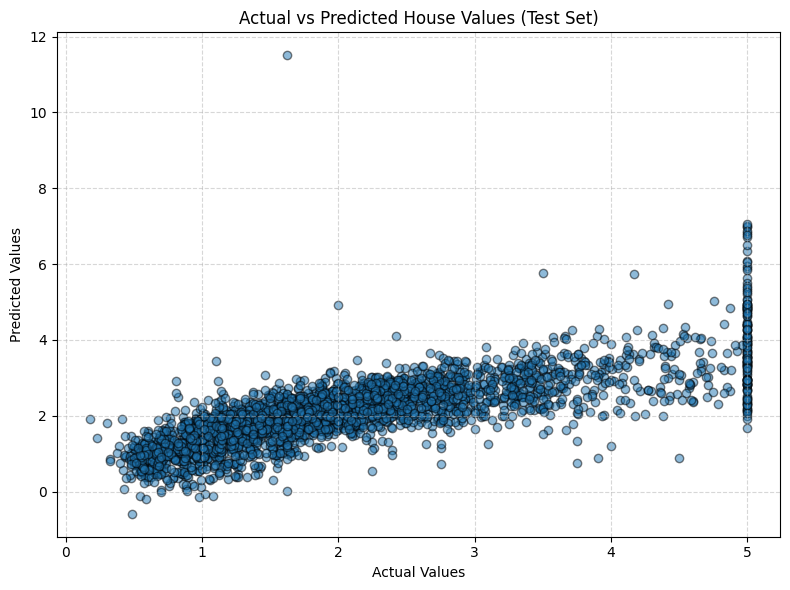

In [9]:
plt.figure(figsize=(8,6))

plt.scatter(y_test, y_test_pred, 
            alpha=0.5, 
            edgecolors="black")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Values (Test Set)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
import os

os.makedirs("../models", exist_ok=True)

joblib.dump(multi_model, "../models/regression_model.pkl")

['../models/regression_model.pkl']